# Intro to Statistics

En la era moderna del entretenimiento, las series de televisión han
experimentado un auge sin precedentes, convirtiéndose en una forma de arte
influyente y una parte integral de la cultura popular junto con películas e
incluso videojuegos. Con la proliferación de plataformas de streaming y la
diversificación de los géneros, la industria del entretenimiento se encuentra
en constante evolución, brindando a los espectadores una amplia gama de
opciones para satisfacer sus gustos y preferencias.

En este proyecto nos vamos a poner en la piel de una compañía como Netflix,
Amazon Prime o HBO. Disponemos de más de 50.000 series, películas y
videojuegos, que son los productos que ofrecemos a nuestros clientes, y
queremos responder a varias preguntas de interés de negocio: 

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    (1) ¿Qué tipo de contenido se está ofreciendo actualmente a nuestros
    clientes?
</div>

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    (2) ¿Qué preferencias tienen nuestros usuarios? ¿Qué tipo de contenido
    valoran mejor y debe apostar la compañia en su estrategia de creación de
    contenido?
</div>

Responder a la primera pregunta (1) es clave para ganar conocimiento y contexto
de los productos. Responder a la segunda (2) puede ayudar a mejorar nuestro
catálogo y por tanto la experiencia de los usuarios con nosotros.

Para poder responder ambas preguntas, contamos con un set de datos para
analizar y extraer **insights**. Definir la estrategia de una compañía es una
tarea de alta complejidad y riesgo. Tomar decisiones desde un enfoque
data-driven solo aumentará las posibilidades de tomar las decisiones correctas.

In [1]:
try:
    import matplotlib
    print("matplotlib instalado correctamente: versión", matplotlib.__version__)
except:
    print("Ejecutar !pip install matplotlib en una celda de código")

try:
    import seaborn
    print("seaborn instalado correctamente: versión", seaborn.__version__)
except:
    print("Ejecutar !pip install seaborn en una celda de código")

try:
    import plotly
    print("plotly instalado correctamente: versión", plotly.__version__)
except:
    print("Ejecutar !pip install plotly en una celda de código")

try:
    import matplotlib
    import seaborn as sns
    import plotly.express as px
    print("\nEstamos listos ✅ 🚀")
except:
    print("\n Revisar librerías faltantes 👀")

matplotlib instalado correctamente: versión 3.10.7
seaborn instalado correctamente: versión 0.13.2
plotly instalado correctamente: versión 6.4.0

Estamos listos ✅ 🚀


In [2]:
!pip install seaborn

In [3]:
!pip install plotly 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import os

# fijamos semilla para reproducibilidad
random.seed(777)

# 0. Lectura de Datos

Vamos a leer y echar un vistazo rápido al dataset que disponemos:

In [5]:
# para usar Colab

# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
!pip install pyarrow

In [7]:
!pip install fastparquet

In [8]:
# TODO: leer el fichero tv_series_dataset.parquet

df = pd.read_parquet("tv_series_dataset.parquet")


In [66]:
df.shape

(56612, 35)

In [68]:
print(df.isnull().sum())
print(df.isnull().sum().sum())


title           0
id              0
release_year    0
cast            0
synopsis        0
rating          0
runtime         0
certificate     0
votes           0
action          0
adventure       0
animation       0
biography       0
comedy          0
crime           0
documentary     0
drama           0
family          0
fantasy         0
game_show       0
history         0
horror          0
music           0
musical         0
mystery         0
news            0
reality_tv      0
romance         0
scifi           0
short           0
sport           0
talk_show       0
thriller        0
war             0
western         0
dtype: int64
0


En total tenemos más de 50.000 productos (peliculas series y videojuegos) en
nuestro dataset y para cada uno de ellos hay 36 columnas con la siguiente
información:

| variable          | descripcion |
|-------------------|-------------|
| title             | Título. |
| id                | ID único por cada producto. |
| release_year | Año de lanzamiento. |
| cast              | Director y principales actores del reparto. |
| synopsis          | Sinopsis. |
| rating            | Nota promedio de los usuarios. |
| runtime           | Duración total o de cada capítulo. |
| certificate       | Certificado del contenido (todos los públicos, +18, etc.). |
| votes             | Número de votos de los usuarios. |
| resto de columnas | variables dummy (1/0) por cada categoría de género a la que puede pertenecer o no el producto. Géneros clasificados: action, adventure, animation, biography, comedy, crime, documentary, drama, family, fantasy, game_show, history, horror, music, musical, mystery, news, reality_tv, romance, scifi, short, sport, talk_show, thriller, war y western |

En total tenemos más de 50.000 productos, y para cada uno de ellos contamos con
35 variables de información. Esto hace un total de $50.000 \cdot 35 = 1.75$ 
millones de valores, de modo que la gran pregunta es ¿cómo podemos resumir
toda la información que tenemos para entender qué productos estamos ofreciendo?
Cada producto es único, pero muchas películas comparten características
similares como por ejemplo un mismo género.

Vamos a analizar cada una de las variables para entender de qué tipo son y
aplicar diferentes herramientas estadísticas para el análisis de los datos.

# 1. Tipos de Variables

Para poder analizar correctamente un set de datos, el primer paso es
identificar qué tipos de variables tenemos. En total hay 4 tipos de variables:

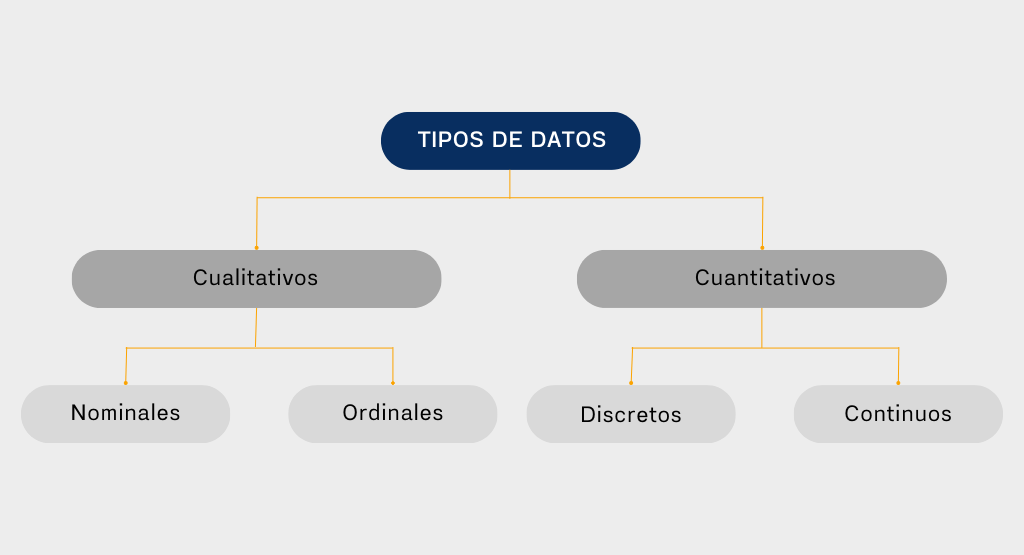


| Categoría | Descripción | Ejemplos |
|-----------|-------------|----------|
| Variables cualitativas o categóricas | Representan categorías o grupos que no tienen un orden intrínseco. | Género, color de ojos, tipo de sangre, nivel de educación |
|   | **Nominales:** Son variables que representan categorías sin un orden inherente. | Género, color de ojos, tipo de sangre |
|   | **Ordinales:** Son variables que representan categorías con un orden predefinido. | Clasificación de productos (bajo, medio, alto), nivel de educación (primaria, secundaria, universitaria) |
| Variables cuantitativas o numéricas | Representan cantidades numéricas y pueden ser discretas o continuas. | Número de hijos, número de estudiantes en una clase, altura, peso, temperatura |
|   | **Discretas:** Son variables que representan valores contables y separados. | Número de hijos, número de estudiantes en una clase |
|   | **Continuas:** Son variables que representan mediciones en una escala continua. | Altura, peso, temperatura |


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    Discutir a qué categoría pertenece cada una de las variables del dataset.
</div>

In [ ]:
# TODO: analisis de cada variable
df.info()

# Year has order
# Title and ID has no relation, no order.

<class 'pandas.core.frame.DataFrame'>
Index: 56612 entries, 95 to 7193
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         56612 non-null  object 
 1   id            56612 non-null  object 
 2   release_year  56612 non-null  int64  
 3   cast          56612 non-null  object 
 4   synopsis      56612 non-null  object 
 5   rating        56612 non-null  float64
 6   runtime       56612 non-null  int32  
 7   certificate   56612 non-null  object 
 8   votes         56612 non-null  int64  
 9   action        56612 non-null  int32  
 10  adventure     56612 non-null  int32  
 11  animation     56612 non-null  int32  
 12  biography     56612 non-null  int32  
 13  comedy        56612 non-null  int32  
 14  crime         56612 non-null  int32  
 15  documentary   56612 non-null  int32  
 16  drama         56612 non-null  int32  
 17  family        56612 non-null  int32  
 18  fantasy       56612 non-null  i

In [72]:
# TODO: iterar con bucle para exportar datos de variables tipo object

for column in df.select_dtypes(include= 'object').columns:
    print(df[column].unique(),'\n')

['the shawshank redemption' 'the dark knight' 'inception' ...
 'h.g. wells and the war of the worlds' 'little dove' 'kindi kids'] 

['tt0111161' 'tt0468569' 'tt1375666' ... 'tt1179775' 'tt8276988'
 'tt12546408'] 

['Director:, Frank Darabont, | ,     Stars:, Tim Robbins, , Morgan Freeman, , Bob Gunton, , William Sadler'
 'Director:, Christopher Nolan, | ,     Stars:, Christian Bale, , Heath Ledger, , Aaron Eckhart, , Michael Caine'
 'Director:, Christopher Nolan, | ,     Stars:, Leonardo DiCaprio, , Joseph Gordon-Levitt, , Elliot Page, , Ken Watanabe'
 ...
 "Director:, Brandy Rainey Amstel, | ,     Stars:, Indiana Adams, , Mark A. Hernandez, , Joseph David, , John O'Dell"
 'Directors:, Dylan Dunkerton, , Nic Genovese, , Aaron LaRocque, , Curtis Robinson, | ,     Stars:, Curtis Robinson, , Dylan Dunkerton, , Finn Iles, , Garret Mechem'
 'Stars:, Amber Connor, , Nicole Gose, , Valerie Schrementi, , Ella Gorcie'] 

['Over the course of several years, two convicts form a friendship, seekin

In [78]:
# TODO: revisar rating, conteos min y max

print(df.rating.max())
print(df.rating.min())

10.0
1.0


Ahora que tenemos claro de qué tipo es cada variable y hemos comprobado que el
tipo se ha leido correctamente podemos empezar a calcular estadísticos y
analizar los datos.

# 2. Medidas de Centralidad

## 2.1. Media

La variable más importante es **rating**, que es precisamente la nota de 0 a 10
que los usuarios han dado a cada contenido. Parece buena idea empezar con esta
variable. ¿cómo valoran en general nuestros usuarios todo nuestro contenido? Si
cogiésemos varios productos al azar, ¿cuál sería la nota que tendrían estos?

Imaginemos que solo tenemos 2 productos, uno con una valoración de 7 y otro con
una valoración de 9. Para determinar el valor que tiene ambos productos
podríamos hacer el siguiente cálculo para resumir ambos valores en una única
nota: $\frac{(7 + 9)}{2} = 8$. Esta sería la nota media de ambos productos.

De forma análoga, podemos aplicar esta operación, pero, en vez de con 2
películas, con un número indeterminado. Dada una lista de números 
$(x_1, x_2, \dots, x_n)$ la media de estos números es: 

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{Media}(x_1, x_2, \dots, x_n) = \frac{(x_1 + x_2 + \dots + x_n)}{n} $$
$$ \text{Media}(x_1, x_2, \dots, x_n) = \frac{\sum_{i=1}^{n} x_i}{n} $$

</font>
</div>

Para calcular la nota media que los usuarios dan a todo nuestro catálogo vamos
a aprovechar las funcionalidades que nos ofrecen los dataframes del paquete
pandas:

In [80]:
# TODO: calcular la media de la variable rating

df.rating.mean()

np.float64(6.239177206246025)

Las más de 50.000 notas que tenemos, han sido resumidas en un único valor que
nos permite entender qué opinan nuestros usuarios de nuestros productos. Esta
es la principal utilidad que vamos a ver repetidamente de los estadísticos de
centralidad: **resumir información**. 

Los productos que estén por encima de la media podemos pensar que son productos
exitosos, deseables a mantener en el catálogo, mientras que los productos por
debajo podemos pensar que son objetivo de análisis para sacar de nuestro
catálogo o dejar de hacer en el futuro. Con juicios como este, vemos cómo
podemos convertir datos en información.

¿Y qué pasa con el número de votos? ¿Cuál es la cantidad de votos que en media
nuestros usuarios aportan a cada producto?

In [82]:
# TODO: calcular la media de la variable votes

print(df.votes.max())
print(df.votes.mean())


2748497
19824.400922065994


La media es una operación numérica, de modo que podemos calcular la media
de todas las variables numéricas que hay en el dataset. El resto de variables
numéricas que nos quedan son: runtime, release_year, y cada uno de los géneros.
Vamos a calcular de una la media para todas las variables numéricas:

In [90]:
# TODO: extraer automáticamente las columnas que son numéricas
# df.select_dtypes(include = 'number').info()
# df.select_dtypes(include = 'number')

numeric_cols = list(df.select_dtypes(include = 'number').columns)

# TODO: calcular la media de todas las columnas numéricas
df[numeric_cols]
df[numeric_cols].agg(['mean'])
df[numeric_cols].agg(['mean']).T

,mean
release_year,1994.474581
rating,6.239177
runtime,88.678902
votes,19824.400922
action,0.186621
adventure,0.151028
animation,0.110242
biography,0.069561
comedy,0.282608
crime,0.142390


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    DISCUTIR qué sentido tiene cada una de las medias, especialmente las
    variables release_year y cada una de las variables de género.
</div>

## 2.2. Mediana

La media es de largo el estadístico de centralidad más extendido, pero no por
ello puede ser la mejor opción siempre. Hay situaciones en las que vamos a
requerir otros estadísticos para entender en torno a qué valor se distribuyen
nuestros datos. Vamos a motivar con un ejemplo el problema que podemos tener
usando la media.

Supongamos una familia de 4 miembros adultos con empleo:
- padre: profesor de instituto en España, 35.000 € / año,
- madre: ingeniera de software staff de una startup con filial en Silicon Valley, 320.000 € / año,
- hijo: técnico de laboratorio en España, 37.000 € / año
- hija: consultora en Big Four en España, 32.000 € / año

¿cuál es el sueldo medio de los miembros de esta familia?

In [95]:
# TODO: calcular medias de la lista [35_000, 320_000, 37_000, 32_000] (numpy)

print(np.mean([35_000, 320_000, 37_000, 32_000]))
print(np.median([35_000, 320_000, 37_000, 32_000]))
print(pd.Series([35_000, 320_000, 37_000, 32_000]).mean())

106000.0
36000.0
106000.0


El salario medio de los miembros de esta familia es 
$\frac{(35.000 + 320.000 + 37.000 + 32.000)}{4} = 106.000$

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    DISCUTIR qué sentido tiene describir el salario de los miembros de la
    familia usando la media.
</div>

Cuando queremos entender entorno a qué valor se distribuyen un conjunto de
números, suele haber una opción mejor que la media, aunque tenga menos fama, y
esta es la **mediana**. Definimos la mediana como sigue:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ Mediana(x_1, x_2, \dots, x_n) = \text{el valor que deja el 50\% de los valores por debajo y el otro 50\% por encima} $$

</font>
</div>

Si $n=100$, la Mediana de $x_1, x_2, \dots, x_n$ sería el valor $X$ que deja 50 valores por debajo y 50 valores por arriba. 

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿cuál es la mediana de los valores 1, 2, ... 100? ¿Y la mediana de los salarios de los miembros de la familia anterior?
</div>

In [97]:
# TODO calcular las medianas de una lista de 1 a 100 y la lista anterior 
np.median([35_000, 320_000, 37_000, 32_000])

np.median(range(1,100)) 

np.float64(50.0)

La mediana es un estadístico mucho más robusto frente a los outliers, a valores
atípicos en una muestra. En el ejemplo de los salarios de la familia la madre
claramente es un outlier frente al resto de familiares, su salario es atípico
y desvirtua el cálculo de la media, mientras que la mediana no se ve afectada
y describe mejor el salario entorno al cual la mayoría de los miembros se
distribuye.

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Habrá outliers en las variables de nuestro dataset que puedan 
    desvirtuar el cálculo de las medias de cada variable?
</div>

In [ ]:
# 1_000_000

In [100]:
# TODO: calcular la media y la mediana a la vez de todas las columnas numéricas

df[numeric_cols].agg(['mean','median','min','max']).T.round(2)

,mean,median,min,max
release_year,1994.47,2005.0,1878.0,2023.0
rating,6.24,6.4,1.0,10.0
runtime,88.68,90.0,1.0,990.0
votes,19824.40,1701.0,5.0,2748497.0
action,0.19,0.0,0.0,1.0
adventure,0.15,0.0,0.0,1.0
animation,0.11,0.0,0.0,1.0
biography,0.07,0.0,0.0,1.0
comedy,0.28,0.0,0.0,1.0
crime,0.14,0.0,0.0,1.0


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    Discutir la diferencia entre la media y la mediana de cada variable ¿qué
    variables presentan más diferencias? ¿qué sentido tiene la mediana de una
    variable dummy? ¿y de la variable release_year?
</div>

## 2.3. Moda

Ahora que hemos visto los dos primeros estadísticos de centralidad, media y
mediana. ¿Cómo podemos hacer lo mismo con variables que no son numéricas?

En nuestro dataset hay varias variables que no son numéricas, de modo que no
podemos hacer ningún cálculo matemático con ellas. ¿Qué hacer con la variable
'certificate', por ejemplo? De nuevo un estadístico nos ayudará, en este caso
es el turno de la moda:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ Moda(x_1, x_2, \dots, x_n) = \text{el valor que aparezca con mayor frecuencia} $$

</font>
</div>

Parece demasiado "naive", pero este simple estadístico es el más extendido como
estadístico de centralidad para variables categóricas y puede ayudarnos a
entender mejor una variable. ¿Cuál es la moda de 'certificate' en nuestro
catálogo de productos?

In [101]:
# TODO: calcular la moda de certificates
df.certificate.mode()[0]

'unknown'

Lamentablemente para nosotros el certificado más frecuente entre los productos
que ofrecemos es el estado de 'unknown'. A lo largo de cualquier análisis es
común encontrar insights importantes para la compañía y que debemos dar valor.
En este caso, que la categoría más frecuente de certificado de películas esté
sin catalogar puede ser muy valioso para muchos análisis y puede merecer la
pena el obtener esta información.

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    Discutir si hay alguna otra variable en nuestro dataset para la que pueda
    ser útil calcular la moda.
</div>

In [103]:
# TODO: explorar mas variables para las que calcular modas

df.info()
df.release_year.mode()

<class 'pandas.core.frame.DataFrame'>
Index: 56612 entries, 95 to 7193
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         56612 non-null  object 
 1   id            56612 non-null  object 
 2   release_year  56612 non-null  int64  
 3   cast          56612 non-null  object 
 4   synopsis      56612 non-null  object 
 5   rating        56612 non-null  float64
 6   runtime       56612 non-null  int32  
 7   certificate   56612 non-null  object 
 8   votes         56612 non-null  int64  
 9   action        56612 non-null  int32  
 10  adventure     56612 non-null  int32  
 11  animation     56612 non-null  int32  
 12  biography     56612 non-null  int32  
 13  comedy        56612 non-null  int32  
 14  crime         56612 non-null  int32  
 15  documentary   56612 non-null  int32  
 16  drama         56612 non-null  int32  
 17  family        56612 non-null  int32  
 18  fantasy       56612 non-null  i

0    2017
Name: release_year, dtype: int64

In [104]:
df.release_year.mode()

0    2017
Name: release_year, dtype: int64

## Summary

Entender los datos es esencial para poder responder cualquier pregunta sobre
ellos, pero no podemos conseguirlo si no resumimos la información y los árboles
nos dejan ver el bosque. Los estadísticos de centralidad nos permiten esto
último, resumir las 35 variables de las 50.000 peliculas, series y videojuegos
para entender un poco mejor el contenido actual que se ha ofrecido a nuestros
usuarios.

Recopilación de todos los estadísticos de centralidad:

In [ ]:
print("-"*50)
print(" MODA DE VARIABLES CATEGORICAS")
print("-"*50)
df[["certificate", "release_year"]].mode()

--------------------------------------------------
 MODA DE VARIABLES CATEGORICAS
--------------------------------------------------


,certificate,release_year
0,unknown,2017


In [107]:
print("#"*50)
print(" MEDIA Y MEDIANA DE VARIABLES NUMÉRICAS")
print("#"*50)

df[numeric_cols].agg(["mean", "median", 'min', 'max']).transpose()

##################################################
 MEDIA Y MEDIANA DE VARIABLES NUMÉRICAS
##################################################


,mean,median,min,max
release_year,1994.474581,2005.0,1878.0,2023.0
rating,6.239177,6.4,1.0,10.0
runtime,88.678902,90.0,1.0,990.0
votes,19824.400922,1701.0,5.0,2748497.0
action,0.186621,0.0,0.0,1.0
adventure,0.151028,0.0,0.0,1.0
animation,0.110242,0.0,0.0,1.0
biography,0.069561,0.0,0.0,1.0
comedy,0.282608,0.0,0.0,1.0
crime,0.142390,0.0,0.0,1.0


# 3. Medidas de Dispersión

Resumir los datos es muy útil, pero quizás a un sólo número es demasiado,
perdemos mucha información por el camino. La mediana del rating de cada
producto del catálogo es un 6.4, pero habrá cierta variabilidad en los datos.
No es lo mismo que el 90% del contenido tenga un rating entre 6.3 y 6.5 a que
esté entre 3.2 y 9.1.

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Cómo podemos medir cuánto varía una variable? ¿cuánto se dispersan sus
    valores?
</div>

Como es de esperar, las medidas de dispersión serán los siguiente estadísticos
que nos ayudarán a responder a estas preguntas para entender mejor los
elementos del catálogo.

## 3.1. Quantiles, quartiles y quintiles

De los tres estadísticos de dispersión en el título de esta sección, el más
importante es el **quantil**. Dada una serie de números 
$(x_1, x_2, \dots, x_n)$ el quantil $q$ de estos es

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{Quantil}_q(x_1, x_2, \dots, x_n) = \text{el valor que deja un $q$\% de los datos por abajo y un $(1-q)$\% a la derecha}$$
$$ Q_q = x_{\left( \left( n + 1 \right) * q \right)} \quad \text{si (n+1) * q es un número entero} $$
$$ Q_q = \frac{x_k + x_{k+1}}{2} \quad \text{si (n+1) * q no es un número entero.} $$

</font>
</div>

Por ejemplo, el quantil 10 de los siguientes valores $1, 2, \dots 20$ es
cualquier valor entre 2.1 y 2.9. El valor 2.5 deja el 10% de los datos (1 y 2)
por debajo y el resto (90%) por encima.

Los quantiles nos permiten entender cómo se distribuyen los datos. Y los
cuantiles más famosos son los quartiles y los quintiles.

- Quartiles: quantiles que dividen la muestra en 4 partes iguales
    - $Quantil_{25}$
    - $Quantil_{50}$
    - $Quantil_{75}$
- Quntiles: quantiles que dividen la muestra en 5 partes iguales
    - $Quantil_{20}$
    - $Quantil_{40}$
    - $Quantil_{60}$
    - $Quantil_{80}$

In [108]:
# TODO: calcular la el quantil 76 y [2,5,9,13,15] manualmente. Primero la posición y después el quantil

(len([2,5,9,13,15]) + 1) * .76

4.5600000000000005

In [109]:
(13 + 15) / 2

14.0

In [114]:
np.quantile(a = [2,5,9,13,15], q = 0.76, method= 'midpoint')

np.float64(14.0)

In [23]:
# TODO: calcular la el quantil 76

In [24]:
# TODO: chequearlo con numpy


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué es el Quantil 50? ¿Y los Quantiles 0 y 100? 
</div>

Vamos a ver un ejemplo real con los datos de **ratings** del catálogo.

In [115]:
# TODO: calcular los quantiles 25, 50 y 75 de rating

df.rating.quantile([0.25, 0.5, 0.75])

0.25    5.5
0.50    6.4
0.75    7.1
Name: rating, dtype: float64

Miremos primero los extremos: un 25% del contenido tiene un rating inferior a
5.5, y otro 25% tiene una nota por encima de 7.1. El último dato es importante,
1 de cada 4 películas recibe un notable o un sobresaliente, pero más importante
aún es el primer dato, 1 de cada 4 películas suspende o roza el suspenso
(<5.5). Si nuetro objetivo es entender qué contenido prefieren nuestros
usuarios, explorar el quantile 25 de productos puede ser buena idea.

Ir variable a variable puede resultar muy tedioso para entender el grado de
dispersión de los datos. En la siguiente celda podemos ver cómo hacer el
cálculo de varios quartiles para varias variables a la vez.

In [117]:
# TODO: calcular los quantiles 25, 50 y 75 de todas las variables numéricas
df[numeric_cols].quantile([0.25, 0.5, 0.75]).T

,0.25,0.50,0.75
release_year,1980.00,2005.0,2015.00
rating,5.50,6.4,7.10
runtime,70.00,90.0,104.00
votes,410.75,1701.0,7595.25
action,0.00,0.0,0.00
adventure,0.00,0.0,0.00
animation,0.00,0.0,0.00
biography,0.00,0.0,0.00
comedy,0.00,0.0,1.00
crime,0.00,0.0,0.00


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    Discutir los quartiles (el grado de dispersión) de cada variable ¿qué
    variables se dispersan menos y cuáles más?
</div>

## 3.2. Varianza y desviación típica

Junto a los quantiles, los estadísticos de dispersión más conocidos son la
varianza y la desviación típica. Ambos estadísticos tienen una definición
matemática muy rigurosa, pero el no ser matemáticos no nos impide
interpretarlos ni utilizarlos.

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \text{Media})^2 $$
$$ \text{StdDev}(X) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \text{Media})^2}$$

</font>
</div>

Tanto la varianza como la desviación típica debemos interpretarla como unos
estadísticos cuyo valor, cuánto mayor sea, mayor grado de dispersión hay en una
muestra. Vamos a ver un par de ejemplos sencillos antes de calcularlos
para las variables de nuestro dataset.

Vamos a descomponer el cálculo paso por paso primero.

In [121]:
# TODO: calcular la varianza y el desviación típica para lista_valores = [2,5,9] manualmente

lista_valores = [2, 5, 9]
media = np.mean(lista_valores)

argumento_0 = (lista_valores[0] - media) ** 2
argumento_1 = (lista_valores[1] - media) ** 2
argumento_2 = (lista_valores[2] - media) ** 2

varianza = (argumento_0 + argumento_1 + argumento_2) / len(lista_valores)
varianza

varianza ** 1/2

np.float64(4.111111111111111)

In [120]:
np.var(lista_valores)

np.float64(8.222222222222221)

In [122]:
np.std(lista_valores)

np.float64(2.8674417556808756)

In [28]:
# TODO: chequearlo con numpy


Supongamos que somos profesores de una clase de 100 alumnos y les hemos hecho 
un exámen tipo test. Vamos a calcular la varianza y desviación típica de las
notas en varios escenarios:

- Escenario 1: los 100 alumnos han sacado un 10 (el exámen era demasiado fácil)

In [123]:
notas = [10]*100
varianza_escenario1 = np.var(notas)
desviacion_tipica_escenario1 = np.std(notas)
print(f"varianza de las notas del escenario 1: {varianza_escenario1}")
print(f"desviación típica de las notas del escenario 1: {desviacion_tipica_escenario1}")

varianza de las notas del escenario 1: 0.0
desviación típica de las notas del escenario 1: 0.0


Como podríamos suponer, si cuanto menos variación en los datos, menor debe ser
el valor de la varianza y la desviación típica, si no hay variación ambos deben
ser 0.

- Escenario 1: 90 alumnos han sacado un 10, pero 10 han sacado un 6.

In [124]:
notas = [10]*90 + [6]*10
varianza_escenario2 = np.var(notas)
desviacion_tipica_escenario2 = np.std(notas)
print(f"varianza de las notas del escenario 2: {varianza_escenario2}")
print(f"desviación típica de las notas del escenario 2: {desviacion_tipica_escenario2}")

varianza de las notas del escenario 2: 1.44
desviación típica de las notas del escenario 2: 1.2


In [125]:
np.mean(notas)

np.float64(9.6)

En cuanto hemos aumentado un poquito la variación de notas, ambos estadísticos
han aumentado. Vamos a ver por último un caso más extremo.

- Escenario 3: los 100 alumnos han respondido al azar a todas las preguntas.

In [126]:
notas = [random.random()*10 for _ in range(100)]
varianza_escenario3 = np.var(notas)
desviacion_tipica_escenario3 = np.std(notas)
print(f"varianza de las notas del escenario 3: {varianza_escenario3}")
print(f"desviación típica de las notas del escenario 3: {desviacion_tipica_escenario3}")

varianza de las notas del escenario 3: 8.124651084646194
desviación típica de las notas del escenario 3: 2.8503773582889327


Con estos tres escenarios podemos ver cómo aumentan ambos estadísticos cuanta
mayor es la variabilidad en los datos. 

La varianza y la desviación típica están fuertemente relacionados, de hecho
cumplen la siguiente relación:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{Varianza} = \text{Desviación Típica}^2$$

</font>
</div>

En la práctica, aunque ambos miden lo mismo, solemos preferir estudiar la
desviación típica ya que está en la escala de la variable original. Vamos a ver
esto último en nuestros datos:

In [129]:
# TODO: calcular la varianza y la desviación típica de todas las variables numéricas

df[numeric_cols].agg(['mean','median','var','std']).T

,mean,median,var,std
release_year,1994.474581,2005.0,6.894618e+02,26.257605
rating,6.239177,6.4,1.626674e+00,1.275411
runtime,88.678902,90.0,2.069764e+03,45.494654
votes,19824.400922,1701.0,6.680305e+09,81733.133027
action,0.186621,0.0,1.517964e-01,0.389611
adventure,0.151028,0.0,1.282208e-01,0.358079
animation,0.110242,0.0,9.809016e-02,0.313193
biography,0.069561,0.0,6.472360e-02,0.254408
comedy,0.282608,0.0,2.027443e-01,0.450271
crime,0.142390,0.0,1.221175e-01,0.349453


<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    Discutir la varianza y la desviación típica de cada variable ¿en qué escala
    está la variable original vs cada estadístico? ¿qué variables tienen mayor
    dispersión?
</div>

## 3.3. Conteos

¿Cómo podemos medir el grado de dispersión de una variable categórica? Tanto
los cuartiles como la varianza y la desviación típica son cálculos numéricos,
no podemos calcular estos estadísticos con variables categóricas.

Para entender el grado de dispersión que hay en variables categóricas,
simplemente podemos ver cuántas categorías hay y cuántos valores hay de cada
categoría.

Vamos a ver cómo podemos calcular estos estadísticos en la práctica.

In [130]:
# TODO: calcular el total de categorías que hay para certificate

df.certificate.mode()

0    unknown
Name: certificate, dtype: object

In [132]:
pd.Series([1,1,2,24,1,2,2,2,2,2,2,2,None]).value_counts(dropna= False)

2.0     8
1.0     3
24.0    1
NaN     1
Name: count, dtype: int64

In [131]:
# TODO: calcular el número de valores que hay en cada categoría para certificate en absoluto y relativo

df.certificate.value_counts()

certificate
unknown    20820
+18        15342
+13        11698
+7          5012
+0          3740
Name: count, dtype: int64

In [134]:
df.value_counts(subset=['certificate'], dropna= False)
df.value_counts(subset=['certificate'], dropna= False, normalize= True)

certificate
unknown        0.367767
+18            0.271003
+13            0.206635
+7             0.088532
+0             0.066064
Name: proportion, dtype: float64

In [35]:
# df.groupby(['certificate'], dropna=False, as_index=False).agg(
#     count=('certificate', lambda x: len(x)),
#     relative_count=('certificate', lambda x: len(x)/len(df))
# )

Cuando tenemos muchas categorías es muy fácil perderse y no saber cómo analizar
tanto conteo. Si es posible, suele ser muy útil el agrupar las categorías en
grupos más grandes.

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Cómo podríamos agrupar el año de lanzamiento en categorías más grandes?
</div>

In [136]:
# TODO: analizar release_year en relativo

df.release_year.value_counts(dropna= False, normalize= True)

release_year
2017    0.034745
2018    0.034109
2016    0.034056
2022    0.032785
2015    0.032573
          ...   
1904    0.000018
1878    0.000018
1888    0.000018
1892    0.000018
1891    0.000018
Name: proportion, Length: 130, dtype: float64

In [144]:
# TODO: agrupar los release_year en categorías más grandes [minimo, 1900, 1950, 1990, 2000, 2005, 2010, 2015, 2020, maximo]

minimo = df.release_year.min()
maximo = df.release_year.max()


pd.cut(
    x = df.release_year,
    bins = [minimo, 1900, 1950, 1990, 2000, 2005, 2010, 2015, 2020, maximo],
    right =  True,
    include_lowest= True
).value_counts(dropna= False).sort_values()
# minimo
# maximo

release_year
(1877.999, 1900.0]       24
(2020.0, 2023.0]       4011
(2000.0, 2005.0]       4289
(2005.0, 2010.0]       5924
(1900.0, 1950.0]       6057
(1990.0, 2000.0]       6167
(2010.0, 2015.0]       8313
(2015.0, 2020.0]       9186
(1950.0, 1990.0]      12641
Name: count, dtype: int64

In [38]:
# TODO: analizar NA e intervalos cerrados a derecha e izquierda

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    Discutir los conteos de release_year ¿tenemos suficientes películas
    "modernas" en el catálogo? ¿qué periodos tiene más presencia y cuáles
    menos?
</div>

## Summary

Calcular medidas de centralidad para resumir la información y entender los
datos es el primer paso, pero si juntamos estos estadísticos con los
estadísticos de dispersión podemos entender mucho mejor cómo se distribuyen
los datos.

Recopilación de estadísticos de centralidad y dispersión:

In [39]:
# print("#"*50)
# print(" ESTADISTICOS DE CENTRALIDAD Y DISPERSIÓN")
# print("#"*50)

# statistics = {
#     "mean": "mean", 
#     "q25": lambda x: x.quantile(0.25),
#     "q50": lambda x: x.quantile(0.50),
#     "q75": lambda x: x.quantile(0.75),
#     "std": "std",
#     "var": "var",
# }
# df_statistics = (
#     df[numeric_cols]  # type: ignore
#     .agg(statistics.values())
#     .transpose()
# )
# df_statistics.columns = statistics.keys()
# df_statistics

In [40]:
# print("#"*50)
# print(" CONTEOS DE VARIABLES CATEGORICAS")
# print("#"*50)
# print("\n")
# print(df[["certificate"]].value_counts(normalize=True, dropna=False))
# print("\n")
# print(pd.cut(df["release_year"], bins=bins, include_lowest=True).value_counts(normalize=True, dropna=False).sort_index(ascending=False))

In [146]:
# TODO: analizar todo de manera resumida con describe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,56612.0,1994.474581,26.257605,1878.0,1980.00,2005.0,2015.00,2023.0
rating,56612.0,6.239177,1.275411,1.0,5.50,6.4,7.10,10.0
runtime,56612.0,88.678902,45.494654,1.0,70.00,90.0,104.00,990.0
votes,56612.0,19824.400922,81733.133027,5.0,410.75,1701.0,7595.25,2748497.0
action,56612.0,0.186621,0.389611,0.0,0.00,0.0,0.00,1.0
adventure,56612.0,0.151028,0.358079,0.0,0.00,0.0,0.00,1.0
animation,56612.0,0.110242,0.313193,0.0,0.00,0.0,0.00,1.0
biography,56612.0,0.069561,0.254408,0.0,0.00,0.0,0.00,1.0
comedy,56612.0,0.282608,0.450271,0.0,0.00,0.0,1.00,1.0
crime,56612.0,0.142390,0.349453,0.0,0.00,0.0,0.00,1.0


# 4. Tipos de Visualizaciones

Los estadísticos son herramientas esenciales para analizar datos. Combinando
los estadísticos de centralidad y dispersión podemos extraer muchos insights de
los datos, pero hay una herramienta que es aún más eficaz: las
``visualizaciones``.

Dicen que una imagen vale más que 1.000 palabras, y de forma análoga podemos
pensar que

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{Un gráfico vale más que 1.000 estadísticos.} $$

</font>
</div>


Vamos a aprovechar la variedad de variables que tenemos en el dataset para
presentar las visualizaciones más importantes con las que analizar la
distribución de los datos de una variables. Nos apoyaremos en el paquete
`seaborn` que se basa en `matplotlib` y nos da una interfaz de alto nivel para
crear gráficos. En la próxima sesión profundizaremos más en cómo visualizar
datos.

## 4.1. Boxplot

El gráfico más relacionado con los estadísticos que hemos visto es el 
``boxplot``. Esta visualización nos va a permitir entender la forma en que se
distribuyen unos datos.

<Axes: ylabel='rating'>

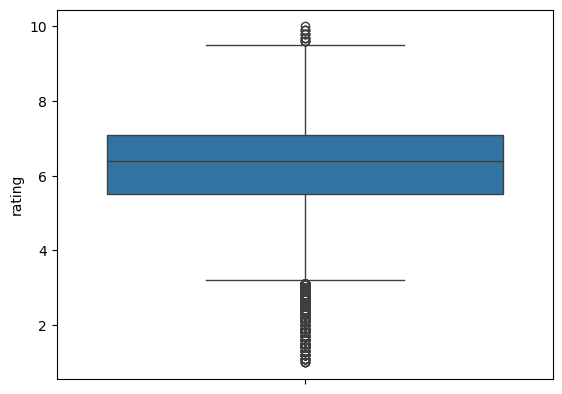

In [150]:
# TODO: Box-plot de la variable rating

sns.boxplot(
    data = df,
    y = 'rating',
)

La forma de leer un gráfico de box-plot es la siguiente:

| elemento | descripción |
|----------|-------------|
| Caja central | La caja en el gráfico representa el ``rango intercuartílico`` (IQR), que es la distancia entre el primer cuartil y el tercer cuartil. El 50% central de los datos se encuentra dentro de esta caja. La línea en el medio de la caja representa la ``mediana``.|
| Bigotes | Los bigotes del gráfico de caja se extienden desde los bordes de la caja hasta los valores más extremos dentro de 1.5 veces el IQR. Estos valores extremos se muestran como puntos individuales en el gráfico.|
| Outliers| Los valores que están más allá de los bigotes se consideran valores ``atípicos`` o ``outliers``. Estos puntos son los valores que están fuera del rango esperado para los datos y podrían indicar la presencia de valores extremadamente altos o bajos en el conjunto de datos.|

In [154]:
iqr = df.rating.quantile(.75) - df.rating.quantile(.25)
iqr

df.rating.quantile(.75) + (1.5 * iqr)
df.rating.quantile(.75) - (1.5 * iqr)

np.float64(4.7)

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

## 4.2. Histogram

Otra forma de visualizar la distribución de una variable es con un 
``histograma``. Un histograma proporciona una representación visual de la
distribución de los datos, mostrando cómo están agrupados los valores y si
existe algún patrón o tendencia en los datos.

<Axes: xlabel='rating', ylabel='Count'>

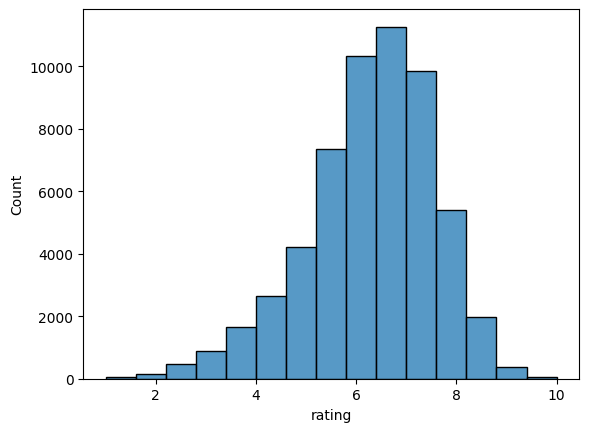

In [159]:
# TODO: histograma de la variable rating

sns.histplot(
    data = df,
    x = 'rating',
    bins = 15
)

La forma de leer un histograma es la siguiente:

| elemento | descripción |
|----------|-------------|
| Eje X | representa los valores del conjunto de datos numéricos.|
| Eje Y | representa la frecuencia o la densidad de ocurrencia de los valores en el conjunto de datos.|
| Barras | cada barra representa un intervalo de valores (llamado "bin") en el eje x y la altura de la barra representa la frecuencia o la densidad de ocurrencia de los valores dentro de ese intervalo.|

Para usar un histograma correctamente debemos responder a la siguiente
pregunta:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Cuántos "bins" elegimos?
</div>

En la práctica solemos apoyarnos en un poco de experimentación para encontrar
un valor adecuado:
- Un valor de bins demasiado pequeño no nos permitirán ver todo el detalle que
hay en la distribución de
- Un valor de bins demasiado alto introducirá mucho ruido en el histograma
dificultando su lectura

## 4.3. Density

Una alternativa muy eficaz frente a los histogramas para evitar tener que
elegir un valor de `bins`, son los gráficos de ``densidad``, los cuales podemos
pensar que son una versión suavizada de los histogramas y que no dependen de
ningún parámetro para su generación.

<Axes: xlabel='rating', ylabel='Density'>

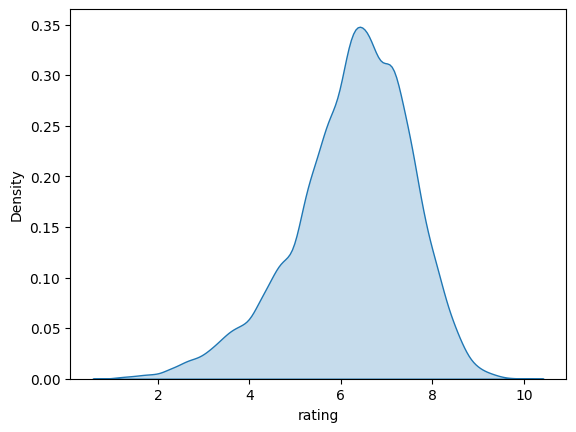

In [161]:
# TODO: density-plot de la variable rating

sns.kdeplot(
    data = df,
    x = 'rating',
    # bins = 15
    fill = True
)

## 4.4. Barplot

Los gráficos de box-plot, histograma y densidad sirven para entender cómo de
distribuye una variable numérica. Ahora debemos preguntarnos qué herramienta
visual puede ayuarnos a entender cómo se distribuye una variable categórica,
y esos son los ``barplots``.

In [167]:
# TODO: calcular cuántos productos hay en cada categoría de certificate

df_barplot = df.groupby(['certificate'], dropna= False, as_index= False).size()

In [168]:
df_barplot

,certificate,size
0,+0,3740
1,+13,11698
2,+18,15342
3,+7,5012
4,unknown,20820


<Axes: xlabel='certificate', ylabel='size'>

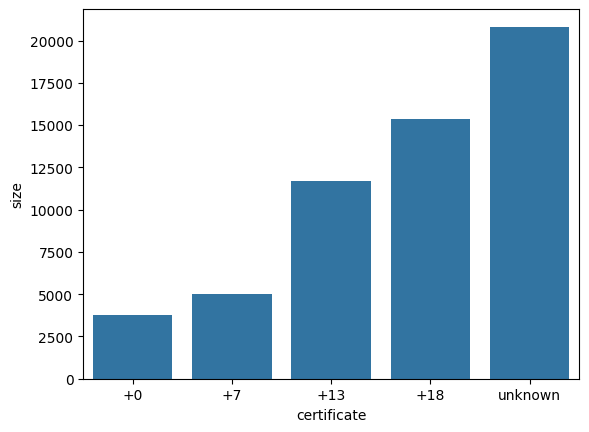

In [170]:
# TODO: barplot de certificate

sns.barplot(
    data = df_barplot.sort_values(['size']),
    x = 'certificate',
    y = 'size'
)

La forma de leer un gráfico de barras es la siguiente:

| elemento | descripción |
|----------|-------------|
| Eje X | representa las categorías o grupos de datos.|
| Eje Y | representa la frecuencia de cada categoría en el eje x.|
| Barras | la altura de cada barra indica la frecuencia de la categoría correspondiente en el eje x.|

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

## 4.5. Lineplot

Hay ocasiones en las que los datos tienen un factor temporal, hay fechas
asociadas a los datos, y debemos tenerlas en cuenta a la hora de visualizarlos.
En estos casos, los gráficos que solemos emplear son los ``lineplots``.

En nuestro dataset contamos con el año de lanzamiento, si no tenemos en cuenta
el orden en el que van los años será dificil visualizar cualquier estadística
que tenga en cuenta esta variable. Vamos a visualizar el número de peliculas
que ha habido cada año.

In [171]:
# TODO: calcular cuántos productos hay en cada año de release_year

df_lineplot = df.groupby(['release_year'], dropna= False, as_index= False).size()

In [172]:
df_lineplot

,release_year,size
0,1878,1
1,1888,1
2,1891,1
3,1892,1
4,1894,9
...,...,...
125,2019,1783
126,2020,1577
127,2021,1599
128,2022,1856


<Axes: xlabel='release_year', ylabel='size'>

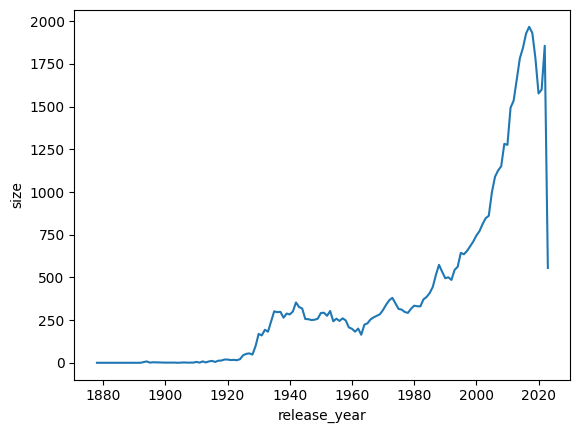

In [176]:
# TODO: barplot del número de peliculas cada año
sns.lineplot(
    data = df_lineplot.sort_values(['size']),
    x = 'release_year',
    y = 'size'
)


In [49]:
# TODO: lineplot del número de peliculas cada año

La forma de leer un gráfico de líneas es la siguiente:

| elemento | descripción |
|----------|-------------|
| Eje X | representa los momentos en el tiempo.|
| Eje Y | representa las mediciones o valores en cada punto en el eje x.|
| Lineas | conectan las mediciones en cada punto del eje x para mostrar la tendencia o el patrón de cambio a lo largo del eje x.|

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

## 4.6. Data-Visualization de los datos

Ahora que tenemos una base estadística y hemos visto las principales
visualizaciones vamos a terminar de analizar visualmente el resto de variables
del dataset para entender el contenido actual de nuestro catálogo de películas.

### 4.6.1. Runtime

<Axes: xlabel='runtime', ylabel='Density'>

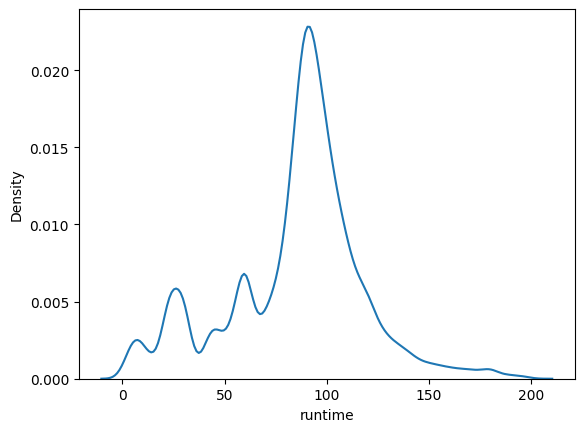

In [179]:
# TODO: density plot de runtime

# sns.kdeplot(
#     data = df,
#     x = 'runtime',
# )

sns.kdeplot(
    data = df.query('runtime < 200'),
    x = 'runtime',
)

In [51]:
# TODO: density plot de runtime con rango acortado

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

### 4.6.2. Votes

In [52]:
# TODO: density plot de votes

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior? ¿cómo podríamos mejorar la lectura del plot para extraer
    insights?
</div>

In [53]:
# TODO: density plot de votes con rango acortado

### 4.6.3. Géneros

In [186]:
# TODO: contar el número de elementos de cada género
generos = ['action', 'adventure', 'animation', 'biography',
       'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
       'game_show', 'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality_tv', 'romance', 'scifi', 'short', 'sport', 'talk_show',
       'thriller', 'war', 'western']

df[generos].sum().to_frame(name = 'n')
df_ = (
    df[generos].sum().reset_index()
)
df_.columns = ['genero','conteo']

In [187]:
df_

,genero,conteo
0,action,10565
1,adventure,8550
2,animation,6241
3,biography,3938
4,comedy,15999
5,crime,8061
6,documentary,5845
7,drama,25184
8,family,4654
9,fantasy,3432


In [55]:
# TODO: barplot de género con orientación invertida

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior? ¿cómo podríamos mejorar la lectura del plot para extraer
    insights?
</div>

<Axes: xlabel='conteo', ylabel='genero'>

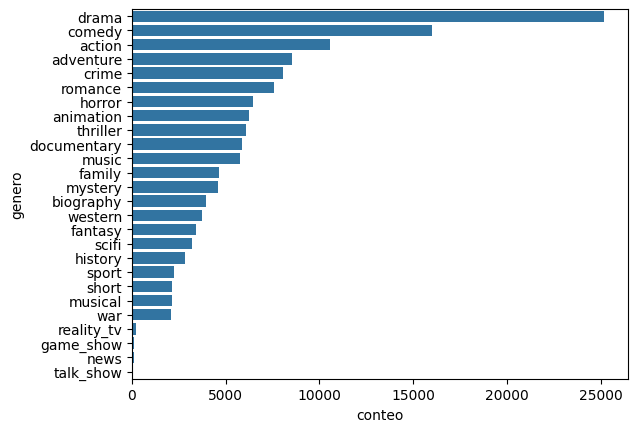

In [191]:
# TODO: barplot de género con orientación invertida y ordenado
sns.barplot(
    data = df_.sort_values(by = 'conteo', ascending= False),
    y = 'genero',
    x = 'conteo'
)

## 4.7. Summary

En cualquier análisis de datos que hagamos, después de realizar todo el
esfuerzo de calcular estadísticos y analizar visualizaciones, nos queda un
último paso que pueder ser hasta mas laborioso:

<div style="background-color: #f2f2f2; border-radius: 5px; padding: 15px;">
<font color='black' size=4>

$$ \text{Recopilar y seleccionar los insights más relevantes para responder las
preguntas que nos planteamos al principio del análisis.} $$

</font>
</div>

En la siguiente sesión hablaremos más en detalle de data-storytelling y en
siguientes asignaturas se profundizará tanto en data visualization como en
data analysis. Por ahora vamos a ser pragmáticos a la hora de responder a las
preguntas iniciales.

Vamos recopilar los principales insights para responder a la primera pregunta:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    (1) ¿Qué tipo de contenido se está ofreciendo actualmente a nuestros
    clientes?
</div>

* **Insight 1: rating**
  > El ``rating`` mediano que los usuarios dan a nuestro contenido es de un
  6.4 y el 50% recibe un ``rating`` entre [~5.5, ~7.0].
  
  > Hay un 15% de películas que suspenden el ``rating`` con menos de un 5.0.

* **Insight 2: genre**
  > El género con mayor volúmen (tier 1) que tenemos es el ``drama`` (44%)
  seguido de ``comedy`` (28%) y ``action`` (18%). El resto de géneros podemos
  clasificarlos en 3 grupos según el volúmen:
    - tier 2 (15-10%): adventure, crime, romance, horror, animation, thriller,
    documentary y music.
    - tier 3 (8-4%): family, mystery, biography, western, fantasy, scifi, 
    history, sport, short, musical y war.
    - residual (<1%): reality_tv, game_show, news y talk_show.

* **Insight 3: votes**
  > Solo unas pocas películas alcanzan niveles muy altos de popularidad en
  ``votes``.

* **Insight 4: release_year**
  > El catálogo tiene un buen equilibrio entre películas modernas y antiguas,
  en favor de las modernas.
  
  > El 50% son posteriores al 2005, aunque hay un 10% que son muy antiguas,
  anteriores a 1950.

* **Insight 5: certificate**
  > Tenemos un 36% de películas con ``certificate`` desconocido.
  
  > Del resto predomina el contenido para ``+18`` con un 27%, seguido de 
  ``+13`` (21%), ``+7`` (9%) y ``+0`` (7%).

* **Insight 6: runtime**
  > El 50% del contenido tiene una ``runtime`` entre 70 y 104 minutos.
  
  > Hay un 3% que dura menos de 15 minutos.

  > Hay un 2% que dura más de 3 horas.

# 5. Preferencias de los usuarios

En esta última sección nos apoyaremos en herramientas visuales para responder a
la segunda pregunta:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    (2) ¿Qué preferencias tienen nuestros usuarios? ¿Qué tipo de contenido
    valoran mejor y debe apostar la compañia en su estrategia de creación de
    contenido?
</div>

## 5.1. Definición de contenido favorito

Vamos a definir el quantil 75 como el límite entre las películas preferidas. 
El 25% de las películas con mayor ``rating`` serán las favoritas de nuestros
usuarios.

In [211]:
# TODO: calcular Q75 de rating y crear una variable que indique si cada elemento es favorito o no

favorito = df.rating.quantile(.75)

df_mod = df.assign(is_favorito = df.rating.gt(favorito))

In [212]:
# df_mod.head()

## 5.2. Exploración visual de contenido favorito vs no-favorito

In [ ]:
# TODO: calcular el número de pelicular favoritas vs no-favoritas por año y relativizar conteos en cada grupo

df_mod_ = df_mod.groupby(['release_year', 'is_favorito'], as_index= False).size()
df_mod_



,release_year,is_favorito,size
0,1878,True,1
1,1888,True,1
2,1891,False,1
3,1892,False,1
4,1894,False,9
...,...,...,...
238,2021,True,433
239,2022,False,1355
240,2022,True,501
241,2023,False,372


In [224]:
df_mod_['size'] = df_mod_.groupby('is_favorito', as_index= False)['size'].transform(lambda x: x / x.sum())


In [225]:
df_mod_

,release_year,is_favorito,size
0,1878,True,0.000072
1,1888,True,0.000072
2,1891,False,0.000023
3,1892,False,0.000023
4,1894,False,0.000211
...,...,...,...
238,2021,True,0.030997
239,2022,False,0.031775
240,2022,True,0.035865
241,2023,False,0.008724


<Axes: xlabel='release_year', ylabel='size'>

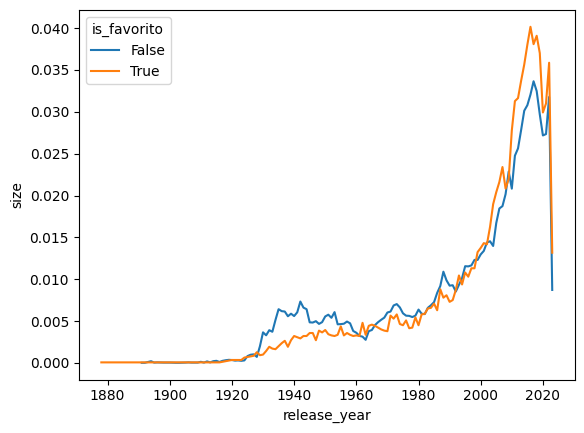

In [226]:
sns.lineplot(
    data = df_mod_,
    y = 'size',
    x = 'release_year',
    hue = 'is_favorito'
)

In [59]:
# TODO: lineplot de favorito vs. no favorito por año

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

<Axes: ylabel='runtime'>

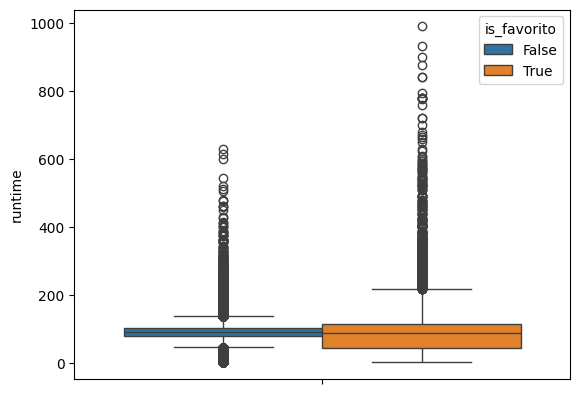

In [227]:
# TODO: boxplot del runtime vs peliculas favoritas y no favoritas

sns.boxplot(
    data = df_mod,
    y = 'runtime',
    hue = 'is_favorito'
)

In [61]:
# TODO: describe del runtime por favorito y no favorito

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

In [62]:
# TODO: calcular el número de pelicular favoritas vs no-favoritas por certificate

In [63]:
# TODO: barplot del número de peliculas favoritas y no favoritas vs certificate

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

In [ ]:
# TODO: calcular el número de pelicular favoritas vs no-favoritas por certificate



In [65]:
# TODO: barplot del número de peliculas favoritas y no favoritas vs certificate

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué insights podemos extraer del gráfico anterior?
</div>

## 5.3. Summary

La recopilación de insights sobre qué tipo de contenido prefieren los usuarios
puede ser la siguiente:

* **Insight 1: release_year**
  > Los usuarios prefieren películas modernas a antiguas.

  > Especialmente las películas entre 1930-1960 son las que más proporción de
  no-favoritas acumulan.

* **Insight 2: runtime**
  > El contenido favorito tiene elementos con un ``runtime`` menor, lo podría
  estar provocado por dos razones:
  1. preferencia por películas más cortas
  2. preferencia por series en vez de películas

* **Insight 3: certificate**
  > Parece que los usuarios tienden a preferir las películas con un
  ``certificate`` de ``+13`` a las de ``+18``

* **Insight 4: genre**
  > El contenido es mas probable que sea favorito en las siguientes categorias:
  documentary, animation, biography, history, short y sport.
  
  > El contenido es menos probable que sea favorito en las siguientes
  categorias: action, romance, horror, thriller, western y scifi.